# Data Bootcamp Final Project - Airline Traveller Survey Analysis

## <a name="Directory"></a>Directory

### [1. Introduction](#Introduction) <br>

### [2. Data import](#Data_import) <br>

### [3. Data cleaning](#Data_cleaning) <br>

### [4. Descriptive analysis](#Descriptive_analysis) <br>
#### [4.1 Surveyed travellers](#Surveyed_travellers) <br>
4.1.1 Continental distribution of surveyed travellers <br>
4.1.2 Demographic distribution of surveyed travellers <br>
4.1.3 Yearly change of surveyed travellers <br>
4.1.4 Cabin flown distribution <br>
#### [4.2 Airlines](#Airlines) <br>
4.2.1 Continental distribution of airlines <br>
4.2.2 Demographic distribution of airlines <br>
4.2.3 Top 30 Airlines' overall rating <br>
#### [4.3 Major region analysis](#Major_region_analysis) <br>


### [5. Regression and Prediction](#Regression_and_prediction) <br>
#### [5.1. Correlation](#Correlation) <br>
5.1.1 The correlation between cabin_dummy and overall rating <br>
5.1.2 The correlation between seat_comfort_rating and overall rating among different continents <br>
5.1.3 The effect of value money rating <br>
5.1.3.1 The regression on value of money <br>

#### [5.2 Regression on variable “recommended”](#recommended) <br>
5.2.1 OLS Linear regression and prediction <br>
5.2.2 Sklearn Logistic regression and prediction <br>

### [6. Conclusion](#Conclusion) <br>

## <a name="Introduction"></a>1. Introduction

This project examines an airline traveller survey based on the feedback of 27283 travellers who travelled from 2011 to 2015 on the airline they took. The survey asks for their rating of the airlines’ overall performance and detailed performance in certain areas such as inflight entertainment, food and beverage, seat comfort and so on. The rating for overall performance ranges from 0 to 10 while for each individual item the maxmimum score is 5.

## <a name="Data_import"></a>2. Data import

#### [Back to Directory](#Directory) <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.max_rows = 500
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
air_data = pd.read_csv('Airline-Dataset.csv',encoding='latin-1')
# sample = pd.read_csv('Sampled.csv')
country = pd.read_csv('country_new1.csv',encoding='latin-1')
country_coord = pd.read_csv('countries_detail.csv')

In [3]:
country_coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [4]:
air_data.head()

,Unnamed: 0,Unnamed: 0.1,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,0,0,Adria Airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4.0,2015.0,1.0
1,1,1,Adria Airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1.0,2015.0,1.0
2,2,2,Adria Airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9.0,2014.0,1.0
3,3,3,Adria Airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9.0,2014.0,1.0
4,4,4,Adria Airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6.0,2014.0,0.0


In [5]:
country.head()

,Unnamed: 0,airline_name,Country_x,capital_name,Name,Country_y
0,0,yangon-airways,NaN,Yangon Airways,Yangon Airways,Burma
1,1,malm-aviation,NaN,Malm Aviation,NaN,Sweden
2,2,beijing-capital-airlines,NaN,Beijing Capital Airlines,NaN,China
3,3,danish-air,NaN,Danish Air,NaN,Denmark
4,4,eastarjet,NaN,Eastarjet,NaN,South Korea


## <a name="Data_cleaning"></a>3. Data cleaning

#### [Back to Directory](#Directory) <br>

#### Drop useless columns

In [6]:
air_data = air_data.drop(['content','author','Unnamed: 0.1'],1)
air_data = air_data.iloc[:,1:]
air_data.head()

,airline_name,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,Adria Airways,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4.0,2015.0,1.0
1,Adria Airways,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1.0,2015.0,1.0
2,Adria Airways,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9.0,2014.0,1.0
3,Adria Airways,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9.0,2014.0,1.0
4,Adria Airways,Poland,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6.0,2014.0,0.0


#### Change the order of the columns

In [7]:
air_data = air_data[['airline_name','Year','Month','author_country','cabin_flown','seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating','overall_rating','recommended']]
air_data.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended
0,Adria Airways,2015.0,4.0,Germany,Economy,4.0,4.0,4.0,0.0,4.0,7.0,1.0
1,Adria Airways,2015.0,1.0,United States,Business Class,4.0,5.0,4.0,1.0,5.0,10.0,1.0
2,Adria Airways,2014.0,9.0,Switzerland,Economy,5.0,5.0,4.0,0.0,5.0,9.0,1.0
3,Adria Airways,2014.0,9.0,Singapore,Business Class,4.0,4.0,3.0,1.0,4.0,8.0,1.0
4,Adria Airways,2014.0,6.0,Poland,Economy,4.0,2.0,1.0,2.0,2.0,4.0,0.0


#### Add dummy variables for different cabins

In [8]:
air_data['cabin_flown'].unique()

array(['Economy', 'Business Class', 'Premium Economy', 'First Class', nan,
       '1', '4'], dtype=object)

In [9]:
air_data['cabin_dummy'] = 0
for i in range(len(air_data['cabin_flown'])):
    if air_data['cabin_flown'].loc[i] == 'Economy':
        air_data.loc[i,'cabin_dummy'] = 1
    elif air_data['cabin_flown'].loc[i] == 'Business Class':
        air_data.loc[i,'cabin_dummy'] = 2
    elif air_data['cabin_flown'].loc[i] == 'Premium Economy':
        air_data.loc[i,'cabin_dummy'] = 3
    elif air_data['cabin_flown'].loc[i] == 'First Class':
        air_data.loc[i,'cabin_dummy'] = 4
    else:
        continue
air_data.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy
0,Adria Airways,2015.0,4.0,Germany,Economy,4.0,4.0,4.0,0.0,4.0,7.0,1.0,1
1,Adria Airways,2015.0,1.0,United States,Business Class,4.0,5.0,4.0,1.0,5.0,10.0,1.0,2
2,Adria Airways,2014.0,9.0,Switzerland,Economy,5.0,5.0,4.0,0.0,5.0,9.0,1.0,1
3,Adria Airways,2014.0,9.0,Singapore,Business Class,4.0,4.0,3.0,1.0,4.0,8.0,1.0,2
4,Adria Airways,2014.0,6.0,Poland,Economy,4.0,2.0,1.0,2.0,2.0,4.0,0.0,1


In [10]:
air_data['cabin_dummy'].value_counts()

1    19829
2     5329
3     1374
4      750
0        5
Name: cabin_dummy, dtype: int64

#### Filter for airlines with over 60 entries (to reduce the extreme value effect)

In [11]:
air_data['count'] = 1
air_data2 = air_data.groupby(['airline_name'])[['count']].sum().sort_values('count',ascending=False)
air_data2.head()

,count
airline_name,
British Airways,855
United Airlines,803
Air Canada Rouge,703
Emirates,685
Lufthansa,586


In [12]:
airline60 = air_data2.loc[air_data2['count']>=60].reset_index('airline_name')['airline_name']
airline60.head()

0     British Airways
1     United Airlines
2    Air Canada Rouge
3            Emirates
4           Lufthansa
Name: airline_name, dtype: object

In [13]:
air_data_60 = air_data.loc[air_data['airline_name'].isin(airline60)]
air_data_60.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count
17,Aegean Airlines,2015.0,7.0,United Kingdom,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1
18,Aegean Airlines,2015.0,7.0,United Kingdom,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1
19,Aegean Airlines,2015.0,6.0,Canada,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1
20,Aegean Airlines,2015.0,6.0,United Kingdom,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1
21,Aegean Airlines,2015.0,5.0,Greece,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1


In [14]:
air_data_60.shape

(24920, 14)

#### Group filtered data by airline names and sort them based on their overall ratings

In [15]:
air_data1 = air_data_60.groupby(['airline_name'])[['overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating','inflight_entertainment_rating','value_money_rating','recommended']].mean().round(2).sort_values('overall_rating',ascending=False)
air_data1.head()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
airline_name,,,,,,,
Air Astana,8.80,4.31,4.57,4.26,3.46,4.31,0.95
Garuda Indonesia,8.31,4.35,4.48,4.03,3.78,4.32,0.91
Indigo Airlines,8.30,3.74,4.27,2.70,0.92,4.35,0.86
Asiana Airlines,8.19,4.12,4.54,4.27,3.46,4.35,0.85
Eva Air,8.13,4.06,4.28,3.76,3.78,4.24,0.88


#### Merge with a file that includes the countries those airlines belong to

In [16]:
country.head()

,Unnamed: 0,airline_name,Country_x,capital_name,Name,Country_y
0,0,yangon-airways,NaN,Yangon Airways,Yangon Airways,Burma
1,1,malm-aviation,NaN,Malm Aviation,NaN,Sweden
2,2,beijing-capital-airlines,NaN,Beijing Capital Airlines,NaN,China
3,3,danish-air,NaN,Danish Air,NaN,Denmark
4,4,eastarjet,NaN,Eastarjet,NaN,South Korea


In [17]:
air_data1.shape

(97, 7)

In [18]:
air_data_merge = air_data1.merge(country[['capital_name', 'Country_y']], left_on='airline_name',right_on = 'capital_name', how='left')
air_data_merge = air_data_merge.rename(columns={'Country_y':'country','capital_name':'airline_name'})
air_data_merge = air_data_merge[['airline_name','country','overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating','inflight_entertainment_rating','value_money_rating','recommended']]
air_data_merge = air_data_merge.set_index('airline_name')
air_data_merge.head()

,country,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
airline_name,,,,,,,,
Air Astana,Kazakhstan,8.80,4.31,4.57,4.26,3.46,4.31,0.95
Garuda Indonesia,Indonesia,8.31,4.35,4.48,4.03,3.78,4.32,0.91
Indigo Airlines,Czech Republic,8.30,3.74,4.27,2.70,0.92,4.35,0.86
Asiana Airlines,Republic of Korea,8.19,4.12,4.54,4.27,3.46,4.35,0.85
Eva Air,Taiwan,8.13,4.06,4.28,3.76,3.78,4.24,0.88


#### Align country names

In [19]:
air_data_merge['country'].replace('Us Airways','United States',inplace=True)
air_data_merge['country'].replace('ALASKA','United States',inplace=True)
air_data_merge['country'].replace('DRAGON','Hong Kong SAR of China',inplace=True)
air_data_merge['country'].replace('Avianca','Colombia',inplace=True)

#### Merge continent column with airlines 

In [20]:
country = air_data_merge['country'].unique()

In [21]:
continent = ['Asia','Asia','Europe','Asia','Asia','Asia','Europe','Asia','Asia','Asia','Europe','Asia','Asia','Asia','Asia','Europe','Europe',
 'Europe','Europe','America','Europe','other','Asia','America','Asia','Europe','Europe','Europe','America','Europe','America','America','Asia',
'Africa','Europe','Europe','Europe','Asia','Asia','Europe','Asia','Europe','Europe','Europe','Europe','Europe','Africa','Europe','Europe',
 'America','Africa','Asia','Europe','Africa','other','America','Africa']

In [22]:
region = pd.DataFrame({'country': country, 'continent': continent})
region.head()

,country,continent
0,Kazakhstan,Asia
1,Indonesia,Asia
2,Czech Republic,Europe
3,Republic of Korea,Asia
4,Taiwan,Asia


In [23]:
air_data_merge = air_data_merge.reset_index('airline_name')
air_data_merge = air_data_merge.merge(region, on='country',how='inner')
air_data_merge = air_data_merge.merge(country_coord[['latitude','longitude','name']], left_on='country', right_on='name',how='left')

In [24]:
air_data_merge = air_data_merge[['airline_name','country','latitude','longitude','continent','overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating','inflight_entertainment_rating','value_money_rating','recommended']]
air_data_merge.head()

,airline_name,country,latitude,longitude,continent,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
0,Air Astana,Kazakhstan,48.019573,66.923684,Asia,8.80,4.31,4.57,4.26,3.46,4.31,0.95
1,Garuda Indonesia,Indonesia,-0.789275,113.921327,Asia,8.31,4.35,4.48,4.03,3.78,4.32,0.91
2,Srilankan Airlines,Indonesia,-0.789275,113.921327,Asia,6.67,3.37,3.99,3.76,2.53,3.73,0.68
3,Indigo Airlines,Czech Republic,49.817492,15.472962,Europe,8.30,3.74,4.27,2.70,0.92,4.35,0.86
4,Asiana Airlines,Republic of Korea,35.907757,127.766922,Asia,8.19,4.12,4.54,4.27,3.46,4.35,0.85


In [25]:
air_data_60.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count
17,Aegean Airlines,2015.0,7.0,United Kingdom,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1
18,Aegean Airlines,2015.0,7.0,United Kingdom,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1
19,Aegean Airlines,2015.0,6.0,Canada,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1
20,Aegean Airlines,2015.0,6.0,United Kingdom,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1
21,Aegean Airlines,2015.0,5.0,Greece,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1


In [26]:
air_data_60=air_data_60.merge(air_data_merge[['airline_name','country']],on = 'airline_name',how = 'left')
air_data_60.rename(columns = {'country':'airline_country'},inplace = True)
air_data_60.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count,airline_country
0,Aegean Airlines,2015.0,7.0,United Kingdom,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1,Greece
1,Aegean Airlines,2015.0,7.0,United Kingdom,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1,Greece
2,Aegean Airlines,2015.0,6.0,Canada,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1,Greece
3,Aegean Airlines,2015.0,6.0,United Kingdom,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1,Greece
4,Aegean Airlines,2015.0,5.0,Greece,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1,Greece


In [27]:
air_data_60=air_data_60.merge(region,left_on='airline_country',right_on = 'country', how = 'left')
air_data_60.head()

,airline_name,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count,airline_country,country,continent
0,Aegean Airlines,2015.0,7.0,United Kingdom,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1,Greece,Greece,Europe
1,Aegean Airlines,2015.0,7.0,United Kingdom,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1,Greece,Greece,Europe
2,Aegean Airlines,2015.0,6.0,Canada,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1,Greece,Greece,Europe
3,Aegean Airlines,2015.0,6.0,United Kingdom,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1,Greece,Greece,Europe
4,Aegean Airlines,2015.0,5.0,Greece,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1,Greece,Greece,Europe


In [28]:
air_data_60.drop(['country'],1)
air_data_60 = air_data_60[['airline_name','airline_country','continent','Year','Month','author_country','cabin_flown','seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating','overall_rating','recommended','cabin_dummy']]
air_data_60['count_ppl'] = 1

### Cleaned data

Every entry of air_data_60 is a traveller's feedback of the airline they chose.

In [29]:
air_data_60.head()

,airline_name,airline_country,continent,Year,Month,author_country,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count_ppl
0,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1
1,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1
2,Aegean Airlines,Greece,Europe,2015.0,6.0,Canada,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1
3,Aegean Airlines,Greece,Europe,2015.0,6.0,United Kingdom,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1
4,Aegean Airlines,Greece,Europe,2015.0,5.0,Greece,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1


In [30]:
air_data_60.shape

(26750, 16)

We group all the travellers' feedback based on the airline they chose stored it in air_data_merge file.

In [31]:
air_data_merge.head()

,airline_name,country,latitude,longitude,continent,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
0,Air Astana,Kazakhstan,48.019573,66.923684,Asia,8.80,4.31,4.57,4.26,3.46,4.31,0.95
1,Garuda Indonesia,Indonesia,-0.789275,113.921327,Asia,8.31,4.35,4.48,4.03,3.78,4.32,0.91
2,Srilankan Airlines,Indonesia,-0.789275,113.921327,Asia,6.67,3.37,3.99,3.76,2.53,3.73,0.68
3,Indigo Airlines,Czech Republic,49.817492,15.472962,Europe,8.30,3.74,4.27,2.70,0.92,4.35,0.86
4,Asiana Airlines,Republic of Korea,35.907757,127.766922,Asia,8.19,4.12,4.54,4.27,3.46,4.35,0.85


In [32]:
air_data_merge.shape

(101, 12)

## <a name="Descriptive_analysis"></a>4. Descriptive analysis

#### [Back to Directory](#Directory) <br>

### <a name="Surveyed_travellers"></a>4.1 Surveyed travellers

#### 4.1.1 Continental distribution of surveyed travellers

In [33]:
air_data_60['count_ppl'] = 1
top5_tra_country = air_data_60.groupby(['author_country'])[['count_ppl']].sum().sort_values('count_ppl',ascending=False).iloc[:4,:]
top5_tra_country.loc['Others','count_ppl'] = air_data_60['count_ppl'].sum()-6944-4689-3824-2571
# top5_tra_country

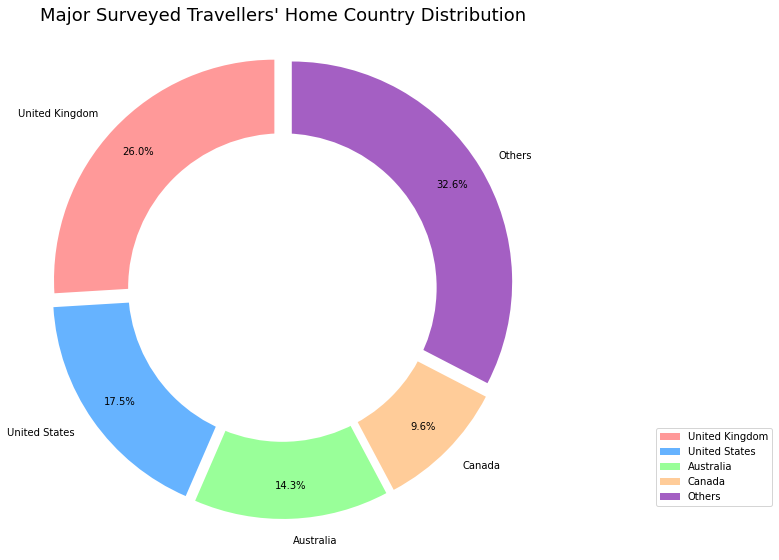

In [35]:
# Pie chart
labels = top5_tra_country.reset_index('author_country')['author_country'].tolist()
sizes = top5_tra_country['count_ppl'].tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#a45fc3']
explode = (0.05,0.05,0.05,0.05,0.05) 

fig, ax3 = plt.subplots(figsize=(8,8))
ax3.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal') 
ax3.set_title("Major Surveyed Travellers' Home Country Distribution", loc='center', size=18)
plt.tight_layout()
plt.legend(loc='lower center',bbox_to_anchor=(1.35, 0.08))
plt.show()

As from the pie chart, we find that during 2011 to 2015, the majority of surveyed travellers were from those relatively developed countries such as the US, the UK, Canada, Austrilia and so on. In "Others" column, developing countries take up a large proportion. Specifically, the UK comes first and takes up 26% of the overall subject, the US follows up by taking up 17.5% and Australia comes third with 14.3% proportion of the total surveyed travellers.

#### 4.1.2 Demographic distribution of surveyed travellers

In [36]:
air_data_60 = air_data_60.merge(country_coord[['latitude','longitude','name']], left_on='author_country', right_on='name',how='left')
air_data_60 = air_data_60.drop(['name'],1)
air_data_60.rename(columns = {'latitude':'author_latitude','longitude':'author_longitude'},inplace = True)
air_data_60 = air_data_60[['airline_name', 'airline_country', 'continent', 'Year', 'Month','author_country',
                          'author_latitude','author_longitude','cabin_flown', 'seat_comfort_rating',
                          'cabin_staff_rating', 'food_beverages_rating','inflight_entertainment_rating',
                          'value_money_rating', 'overall_rating','recommended', 'cabin_dummy', 'count_ppl']]


In [36]:
import os
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

The following code requires Basemap package to run.
(try conda install -c conda-forge basemap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4790: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4791: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4797: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]
/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4828: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(lonsin<lon_0-180,lonsin>lon_0+180)
/opt

Text(0.5, 1.0, 'Country distribution of surveyed travellers')

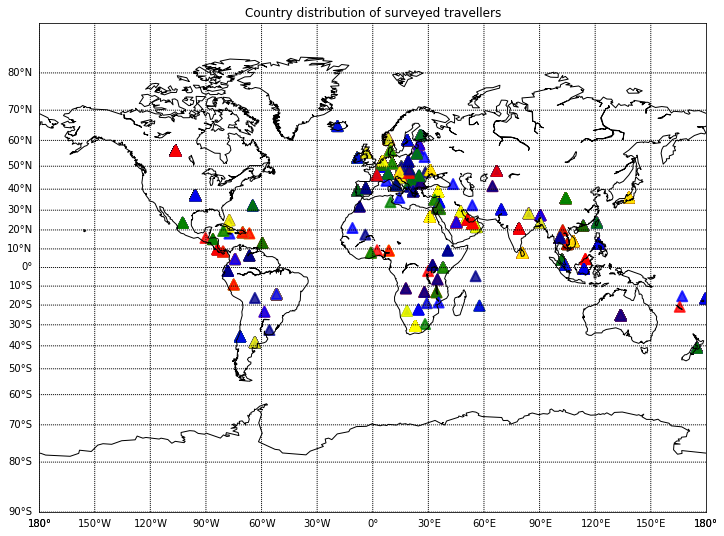

In [37]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from numpy import linspace
from numpy import meshgrid

fig = plt.figure(figsize = (12,9))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10), labels=[True, False, False, False])
m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])

sites_lat_y = air_data_60['author_latitude'].tolist()
sites_lon_x = air_data_60['author_longitude'].tolist()
colors = ['green','red','blue','darkblue','yellow']*5350
m.scatter(sites_lon_x, sites_lat_y, latlon=True, s=100, c=colors, marker='^', alpha=0.8, linewidth=2)

plt.title('Country distribution of surveyed travellers')

From the labeled map of surveyed travellers, we find that the dataset includes travellers from the the majority of the countries in the world and most of them came from Europe, Africa and America.

#### 4.1.3 Yearly change of surveyed travellers

In [37]:
year = air_data_60.groupby(['Year','continent'])[['count_ppl']].sum()
year.drop(1970,0,inplace=True)
year = year.reset_index('Year')
# year.head()

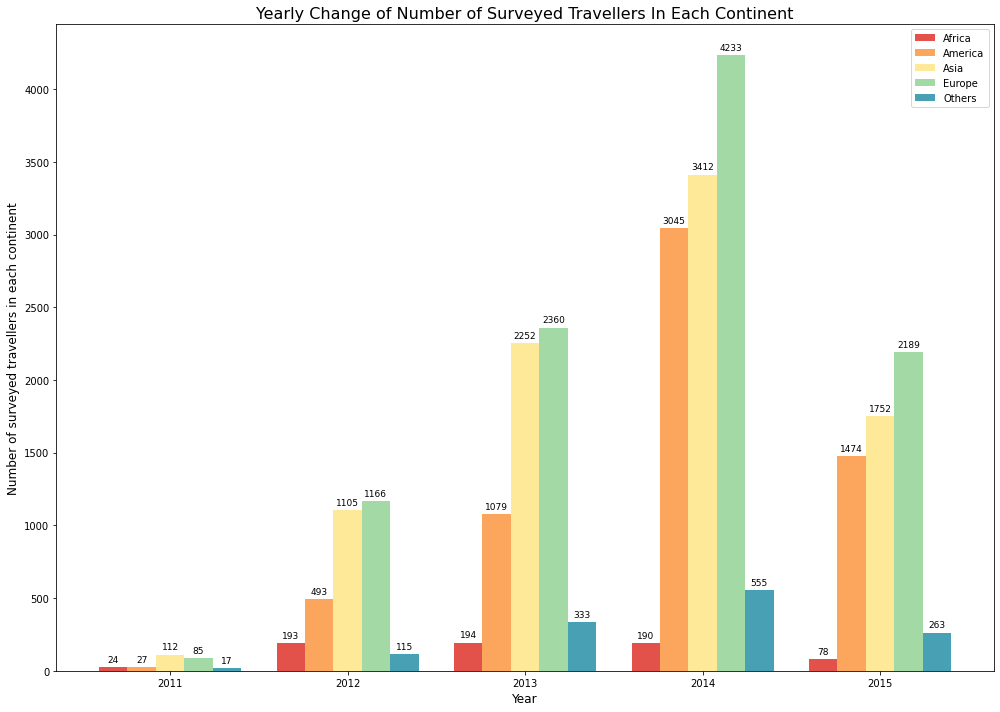

In [39]:
labels = ['2011', '2012', '2013', '2014', '2015']

Africa = year.loc['Africa','count_ppl'].tolist()
America = year.loc['America','count_ppl'].tolist()
Asia = year.loc['Asia','count_ppl'].tolist()
Europe = year.loc['Europe','count_ppl'].tolist()
Others = year.loc['other','count_ppl'].tolist()

x = np.arange(len(labels))  # the label locations
# print(x)
width = 0.16  # the width of the bars

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

fig, ax = plt.subplots(figsize=(14,10))
rects1 = ax.bar(x - 2*width, Africa, width, label='Africa', color=colors[1])
rects2 = ax.bar(x - 1*width, America, width, label='America', color=colors[2])
rects3 = ax.bar(x , Asia, width, label='Asia', color=colors[3])
rects4 = ax.bar(x + 1*width, Europe, width, label='Europe', color=colors[5])
rects5 = ax.bar(x + 2*width, Others, width, label='Others', color=colors[6])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year',size=12)
ax.set_ylabel('Number of surveyed travellers in each continent',size=12)
ax.set_title('Yearly Change of Number of Surveyed Travellers In Each Continent',size=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=9)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.show()

The overall trend of air traffic was on the rise for the first 4 years of 2011 to 2015 period while it dropped dramatically in 2015. Among all the major continents, the Europeans take the lead while the Asians come second.

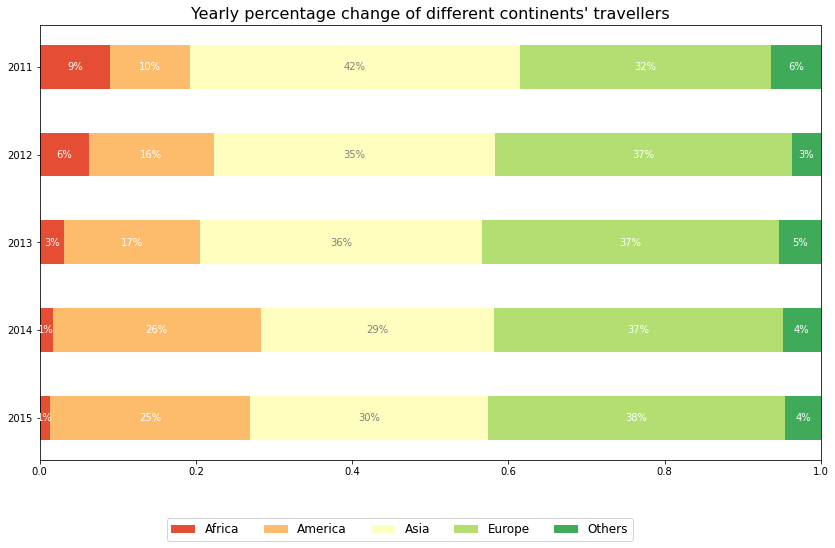

In [41]:
sum2011 = sum([24, 27, 112, 85, 17])
sum2012 = sum([193, 493, 1105, 1166, 115])
sum2013 = sum([194, 1079, 2252, 2360, 333])
sum2014 = sum([190, 3045, 3412, 4233, 555])
sum2015 = sum([78, 1474, 1752, 2189, 263])

category_names = ['Africa', 'America', 'Asia', 'Europe', 'Others']
#normalization
results = {
    '2011': [24/sum2011, 27/sum2011, 112/sum2011, 85/sum2011, 17/sum2011],
    '2012': [193/sum2012, 493/sum2012, 1105/sum2012, 1166/sum2012, 115/sum2012],
    '2013': [194/sum2013, 1079/sum2013, 2252/sum2013, 2360/sum2013, 333/sum2013],
    '2014': [190/sum2014, 3045/sum2014, 3412/sum2014, 4233/sum2014, 555/sum2014],
    '2015': [78/sum2015, 1474/sum2015, 1752/sum2015, 2189/sum2015, 263/sum2015],
}

def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
#     print(data)
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else '#817E7E'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(100*c))+'%', ha='center', va='center',
                    color=text_color)
#             print(c)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.155, -0.2),
              loc='lower left', fontsize='large')
    ax.set_title("Yearly percentage change of different continents' travellers", size=16)
    return fig, ax
survey(results, category_names)
plt.show()

The proportion of travellers from different continents is relatively stable. To be specific, the Europeans and then Asians are the top 2 among all major continents while the Americans and the Africans take up the 3rd and 4th places respectively.

#### 4.1.4 Cabin flown distribution 

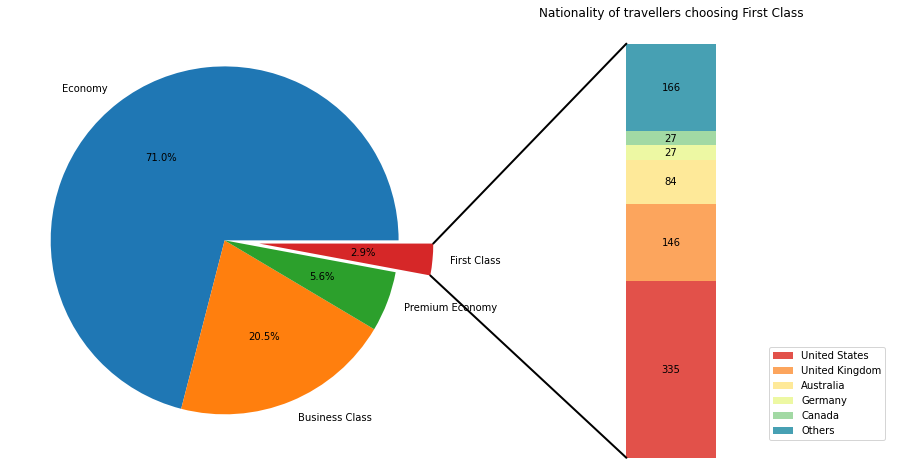

In [42]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = air_data_60['cabin_flown'].value_counts().tolist()
labels = ['Economy', 'Business Class', 'Premium Economy','First Class']
explode = [0, 0, 0, 0.2]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters
xpos = 0
bottom = 0
ratios = air_data_60.loc[air_data_60['cabin_flown']=='First Class']['author_country'].value_counts().iloc[:5].tolist()
others = 785-335-146-84-27-27
ratios.append(others)
width = .2
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j+1])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, (ax2.patches[j].get_height()), ha='center', va='center')

ax2.set_title('Nationality of travellers choosing First Class')
ax2.legend(('United States', 'United Kingdom', 'Australia', 'Germany', 'Canada', 'Others'), 
           loc='lower center',bbox_to_anchor=(0.85, 0.03))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[3].theta1, ax1.patches[3].theta2
center, r = ax1.patches[3].center, ax1.patches[3].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
plt.show()

As expected, economy class takes up a predominately porportion (which is 71%) of the overall cabin flown while the first class has only 2.9% shares. Taking a closer look at the components of travellers taking first class, we find most of them are from developed countries where their GDP per capita is highers and citizens there are relatively wealthier. 

### <a name="Airlines"></a>4.2 Airlines

#### 4.2.1 Continental distribution of airlines

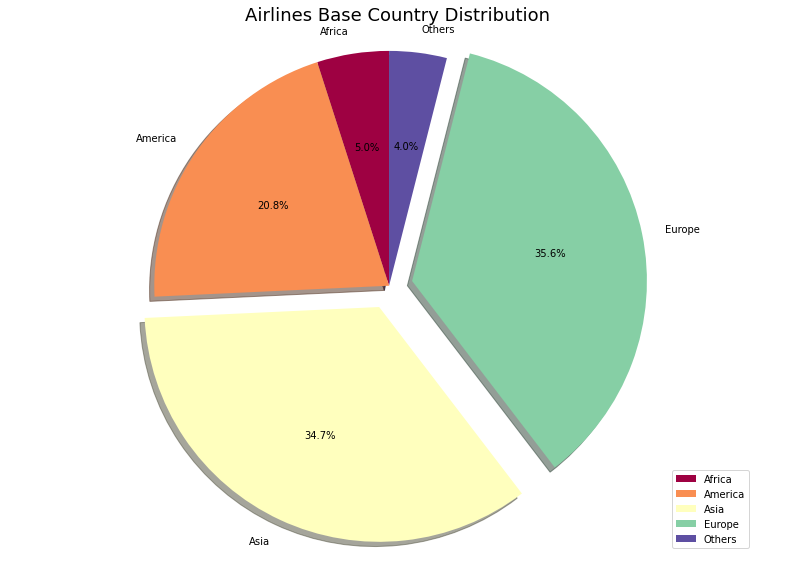

In [44]:
air_data_merge['count'] = 1
region = air_data_merge.groupby(['continent'])['count'].sum()
labels = 'Africa', 'America', 'Asia', 'Europe', 'Others'
sizes = region
explode = (0, 0, 0.1, 0.1, 0) 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

fig, ax1 = plt.subplots(figsize=(14,10))
ax1.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
ax1.set_title("Airlines Base Country Distribution", loc='center', size=18)
plt.legend(loc='lower center',bbox_to_anchor=(0.9, 0.03))
plt.show()

Among all airlines who have feedbacks from at least 60 different surveyed travellers, airlines from Europe and Aisa take up a large proportion of airline database and airlines from America come third. 

#### 4.2.2 Demographic distribution of airlines

The following code requires Basemap package to run.
(try conda install -c conda-forge basemap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


Text(0.5, 1.0, 'Country distribution of airlines')

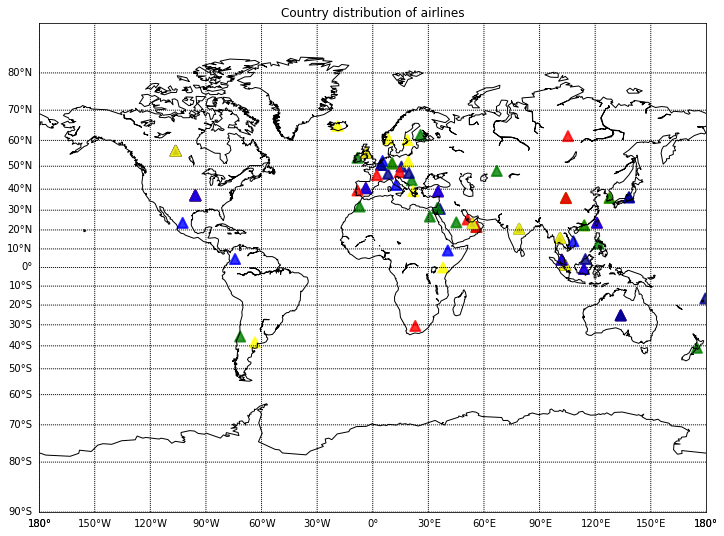

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from numpy import linspace
from numpy import meshgrid

fig = plt.figure(figsize = (12,9))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10), labels=[True, False, False, False])
m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])

sites_lat_y = air_data_merge['latitude'].tolist()
sites_lon_x = air_data_merge['longitude'].tolist()
colors = ['green','red','blue','darkblue','yellow']*20+['green']
m.scatter(sites_lon_x, sites_lat_y, latlon=True, s=100, c=colors, marker='^', alpha=0.8, linewidth=2)

plt.title('Country distribution of airlines')

From the labeled map, we visualize the distribution of airlines based on the countries they belong to and it is clearly that Europe and Southern Asia is where airline industry mostly thrives.

#### 4.2.3 Top 30 Airlines' overall rating

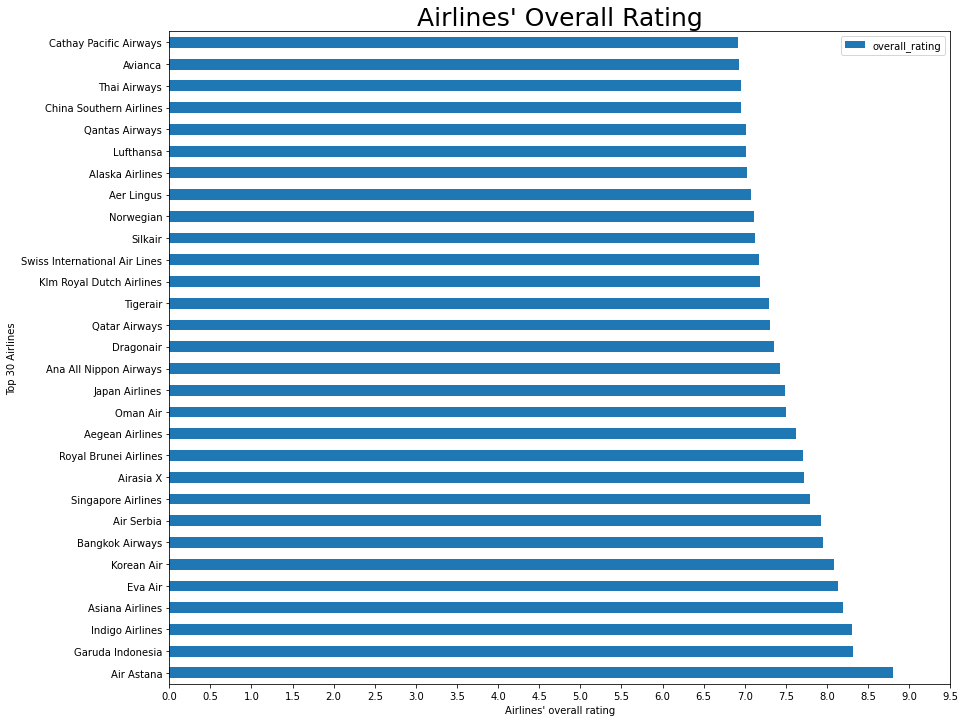

In [46]:
top30 = air_data_merge.sort_values('overall_rating', ascending=False).iloc[:30]

fig, ax2 = plt.subplots()
top30.plot.barh(x='airline_name', y='overall_rating', figsize=(14,12), ax=ax2)

ax2.set_title("Airlines' Overall Rating", loc='center', size=25)
ax2.set_xlabel("Airlines' overall rating", size=10)
ax2.set_ylabel('Top 30 Airlines', size=10)
ax2.set_xticks(np.arange(0,10,0.5))
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

From the sorted horizontal bar chart of top 30 overall rating airlines given by surveyed travellers, we find that those most famous airlines in the world does not appear frequently in the chart. Say, none of the US's big 4 airlines received the top 30 overall rating.

### <a name="Major_region_analysis"></a>4.3 Major country analysis

In [47]:
or_mean = air_data_merge.groupby(['country'])[['overall_rating']].mean().sort_values('overall_rating', ascending=False)
or_mean.loc['Mean','overall_rating'] = or_mean['overall_rating'].mean()
or_mean = or_mean.sort_values('overall_rating', ascending=False)
or_mean.head()

,overall_rating
country,
Kazakhstan,8.800
Czech Republic,8.300
Republic of Korea,8.135
Serbia,7.930
Brunei,7.710


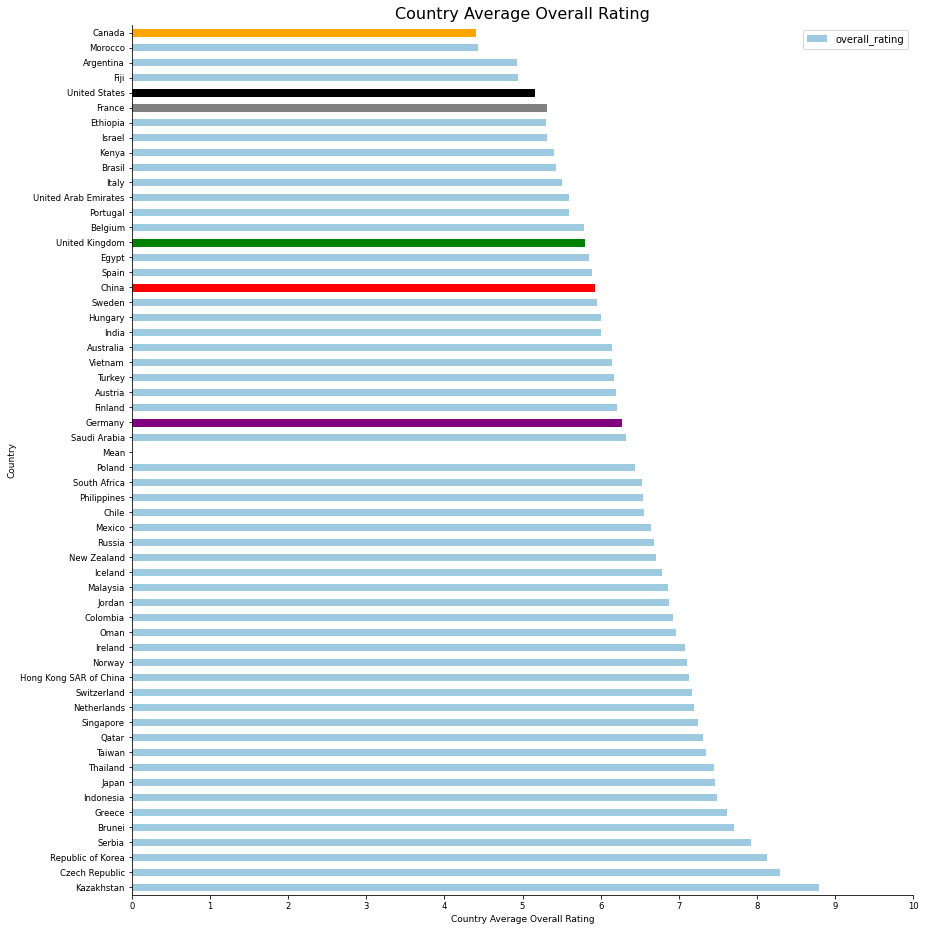

In [51]:
fig,ax = plt.subplots()
or_mean.plot.barh(figsize=(14,16),ax=ax, color='#9ecae1')
ax.get_children()[list(or_mean.index).index('United States')].set_color('black') #highlight a specific line
ax.get_children()[list(or_mean.index).index('China')].set_color('red')
ax.get_children()[list(or_mean.index).index('United Kingdom')].set_color('green')
ax.get_children()[list(or_mean.index).index('Canada')].set_color('orange')
ax.get_children()[list(or_mean.index).index('Germany')].set_color('purple')
ax.get_children()[list(or_mean.index).index('France')].set_color('grey')
ax.get_children()[list(or_mean.index).index('Mean')].set_color('white')
ax.set_title('Country Average Overall Rating', loc='center', size=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Country', size=9)
ax.set_xlabel('Country Average Overall Rating', size=9)
plt.yticks(fontsize=8.5)
plt.xticks(np.arange(0, 10.5, step=1), fontsize=8.5)
plt.show()

From the sorted horizontal bar chart above, we find that airlines from some of the well-known countries do not have a very high overall rating (usually even below average). It is kind of counter-intuitive because usually we assume the more developed and prosperous a country is, the better the product/service from the country will be accepted by the public, However, it turns out to be the opposite.

## <a name="Regression_and_prediction"></a>5. Regression and Prediction

#### [Back to Directory](#Directory) <br>

### <a name="Correlation"></a>5.1. Correlation

Considering airlines based in different continents may have different opinions on rating, we would like to divide it into four continents that are America, Asia, Europe and Africa. Then we will figure out which factor influences the overall rating most.

In [52]:
con = ['Asia','Europe','America','Africa']
air_data_merge_con4 = air_data_merge.loc[air_data_merge['continent'].isin(con)]
America_cor = air_data_merge.loc[air_data_merge['continent']=='America'][['overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
               'inflight_entertainment_rating','value_money_rating','recommended']].corr()
Asia_cor = air_data_merge.loc[air_data_merge['continent']=='Asia'][['overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
               'inflight_entertainment_rating','value_money_rating','recommended']].corr()
Europe_cor = air_data_merge.loc[air_data_merge['continent']=='Europe'][['overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
               'inflight_entertainment_rating','value_money_rating','recommended']].corr()
Africa_cor = air_data_merge.loc[air_data_merge['continent']=='Africa'][['overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
               'inflight_entertainment_rating','value_money_rating','recommended']].corr()

Text(0.5, 1.0, 'Correlation on Overall Rating and parameters in Africa')

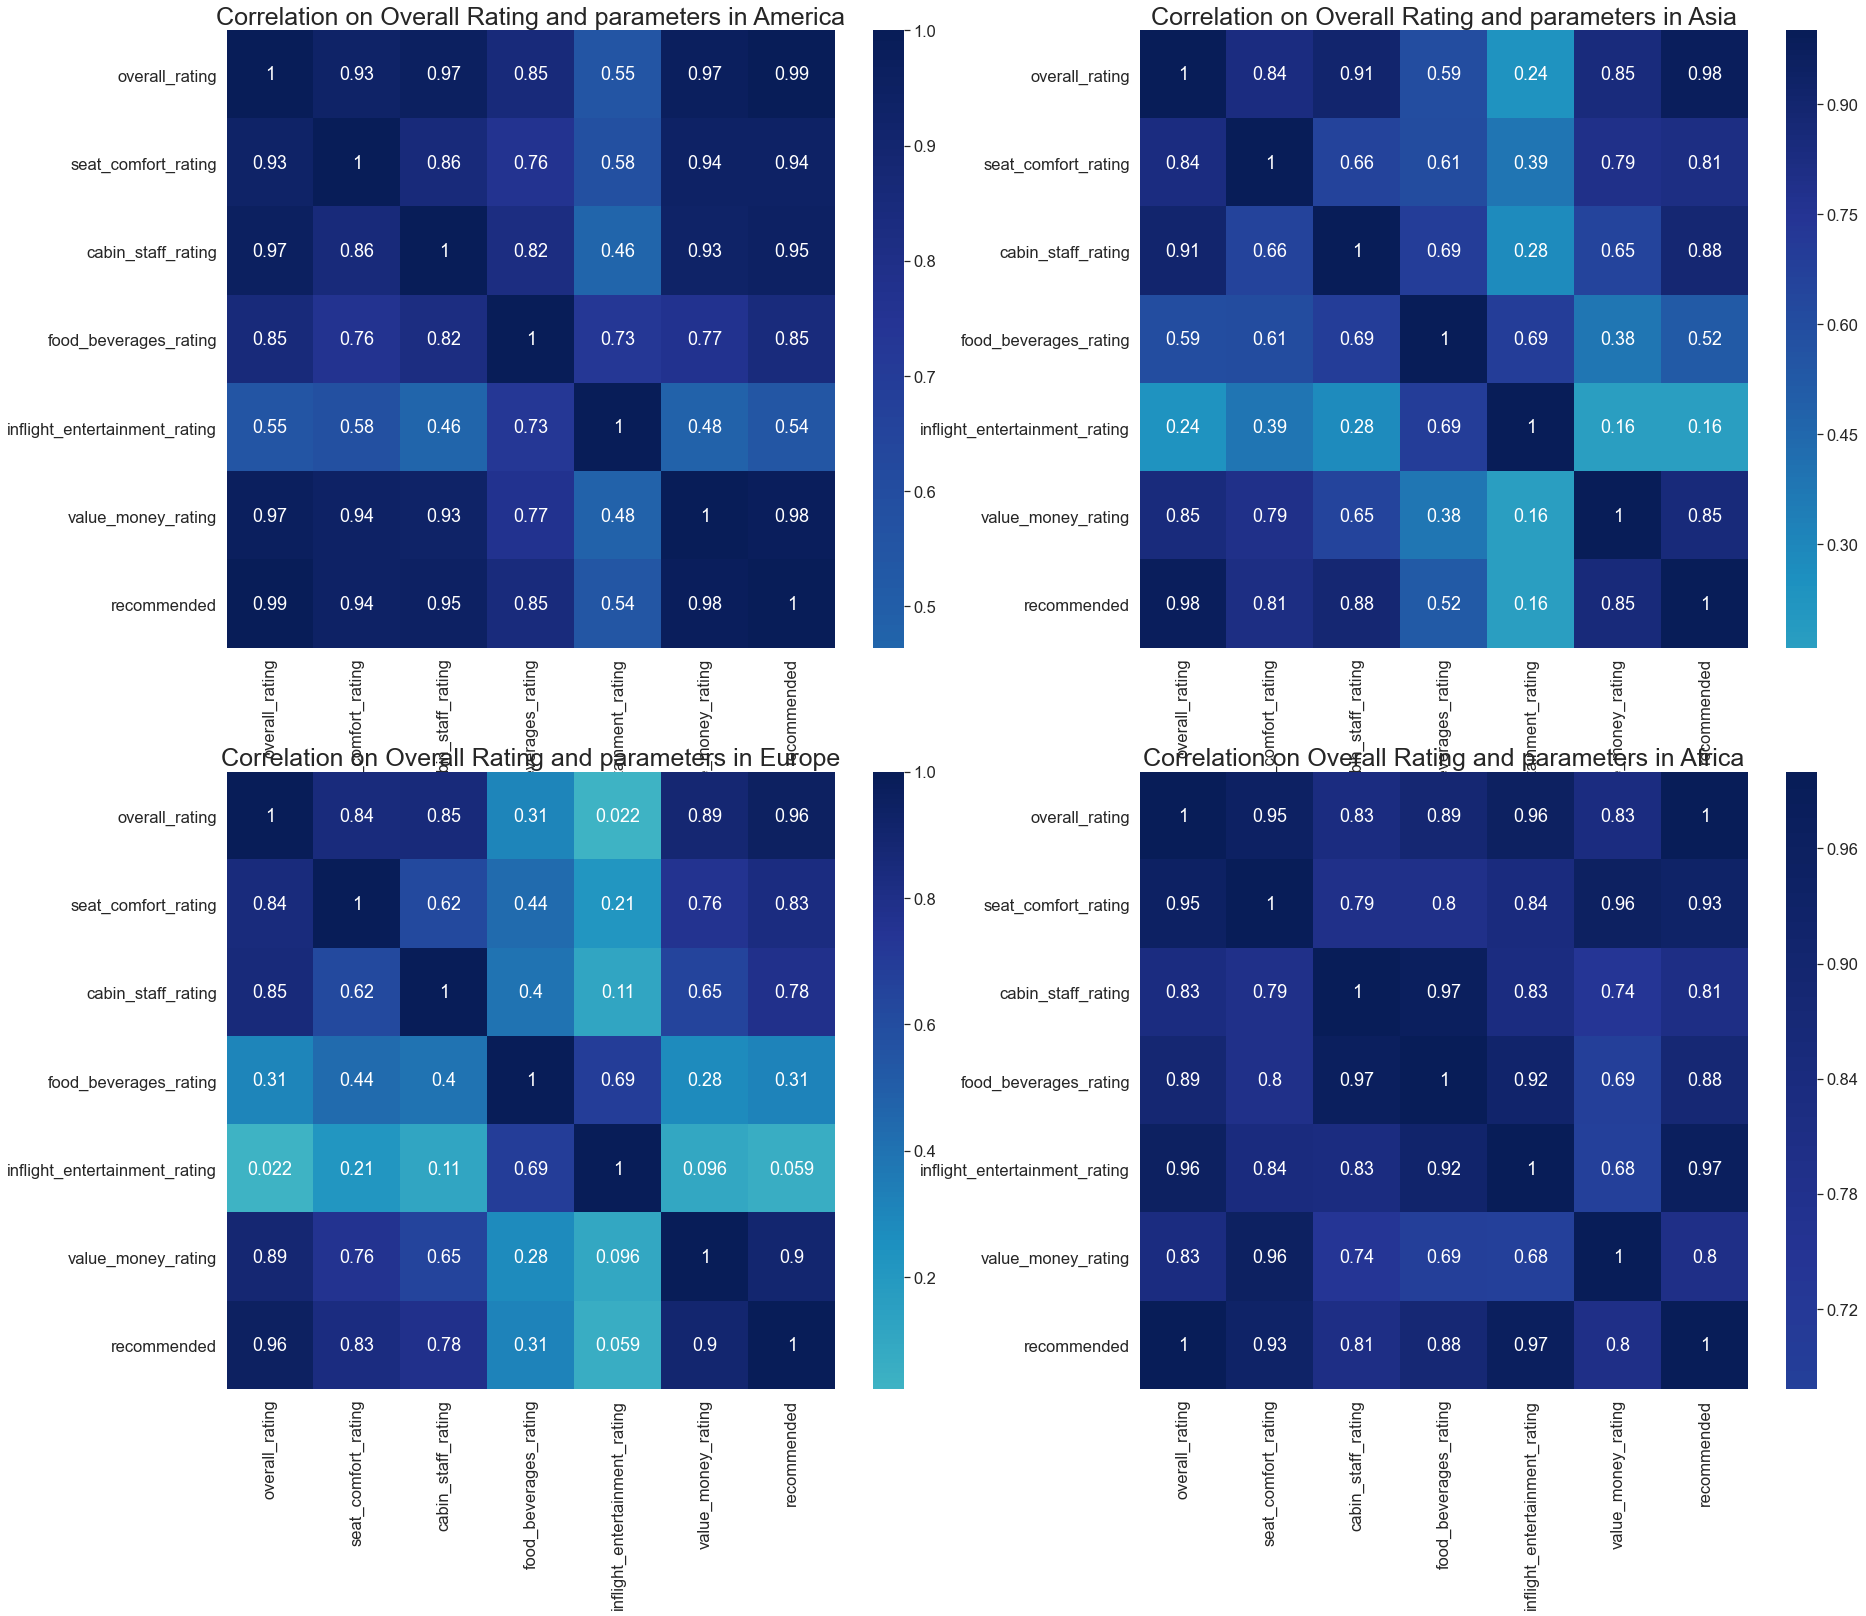

In [53]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(2, 2, figsize=(30, 25))
sns.heatmap(America_cor,annot=True,center = 0 ,cmap="YlGnBu",ax = ax[0,0])
sns.heatmap(Asia_cor,annot=True,center = 0 ,cmap="YlGnBu",ax = ax[0,1])
sns.heatmap(Europe_cor,annot=True,center = 0 ,cmap="YlGnBu",ax = ax[1,0])
sns.heatmap(Africa_cor,annot=True,center = 0 ,cmap="YlGnBu",ax = ax[1,1])
ax[0,0].set_title("Correlation on Overall Rating and parameters in America",size = 25)
ax[0,1].set_title("Correlation on Overall Rating and parameters in Asia",size = 25)
ax[1,0].set_title("Correlation on Overall Rating and parameters in Europe",size = 25)
ax[1,1].set_title("Correlation on Overall Rating and parameters in Africa",size = 25)

We can see from the chart above, the darker the blue is, the higher correlation corresponding to the x and y variable. Although different continents has different number on correlation, the correlation matrices above share similar trends among continents. We will analyze the details of the correlation between seat_comfort_rating and overall_rating; cabin_staff_rating and overall_rating; value_money_rating and overall_rating; recommended and overall_rating, seat_comfort_rating and recommendation below.

#### 5.1.1 The correlation between cabin_dummy and overall rating

The larger the cabin_dummy, the better cabin is. Specifically, 1 stands for Economy Class, 2 stands for Business Class, 3 stands for Premium Economy and 4 stands for First Class. People who took higher class cabin may have stricter criterion on the service from staff, seat comfort, food beverages and inflight entertainment may have stricter on rating. We want to testify our hypothesis that the higher the cabin, the lower the rate is.

In [54]:
cabin1 = air_data_60.loc[air_data_60['cabin_dummy']==1][['seat_comfort_rating','overall_rating']]
cabin1 = cabin1.rename(columns = {'overall_rating':'Overall_rating Total Number'})
cabin1 = cabin1.groupby(cabin1['Overall_rating Total Number']).count()

cabin2 = air_data_60.loc[air_data_60['cabin_dummy']==2][['seat_comfort_rating','overall_rating']]
cabin2 = cabin2.rename(columns = {'overall_rating':'Overall_rating Total Number'})
cabin2 = cabin2.groupby(cabin2['Overall_rating Total Number']).count()

cabin3 = air_data_60.loc[air_data_60['cabin_dummy']==3][['seat_comfort_rating','overall_rating']]
cabin3 = cabin3.rename(columns = {'overall_rating':'Overall_rating Total Number'})
cabin3 = cabin3.groupby(cabin3['Overall_rating Total Number']).count()

cabin4 = air_data_60.loc[air_data_60['cabin_dummy']==4][['seat_comfort_rating','overall_rating']]
cabin4 = cabin4.rename(columns = {'overall_rating':'Overall_rating Total Number'})
cabin4 = cabin4.groupby(cabin4['Overall_rating Total Number']).count()

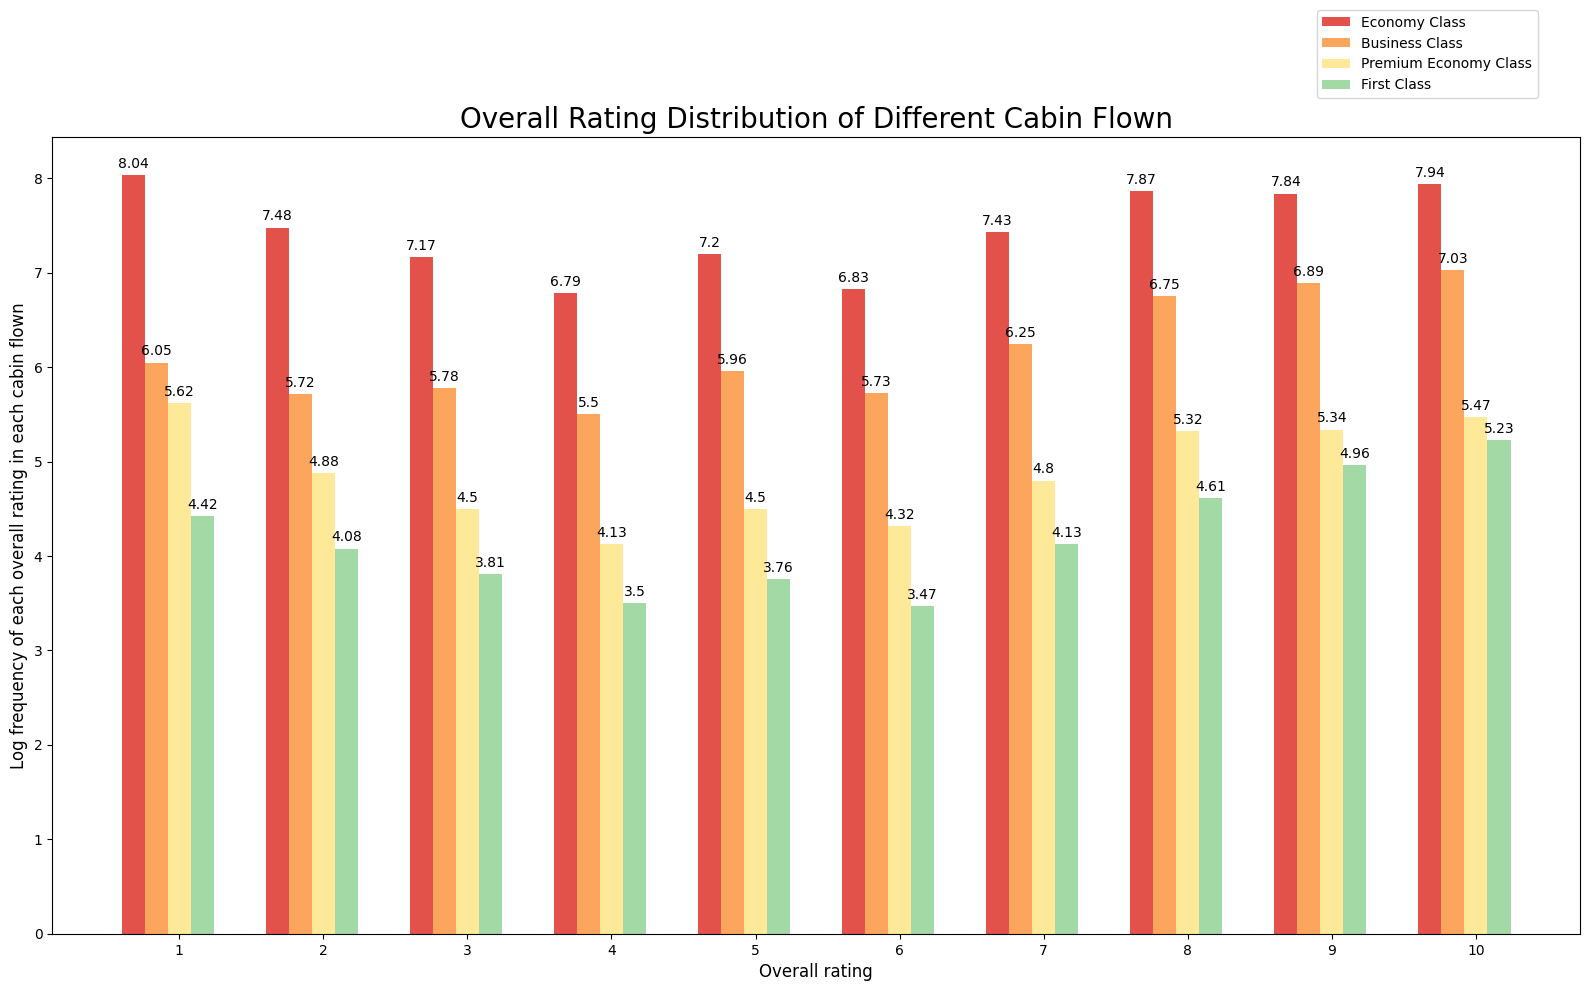

In [55]:
mpl.rcParams.update(mpl.rcParamsDefault)
labels = [i for i in range(1,11)]

economy = np.log(cabin1['seat_comfort_rating'].tolist()).round(2)
business = np.log(cabin2['seat_comfort_rating'].tolist()).round(2)
premium = np.log(cabin3['seat_comfort_rating'].tolist()).round(2)
first = np.log(cabin4['seat_comfort_rating'].tolist()).round(2)

x = np.arange(len(labels))  # the label locations
width = 0.16  # the width of the bars

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

fig, ax = plt.subplots(figsize=(16,10))
rects1 = ax.bar(x - 2*width, economy, width, label='Economy Class', color=colors[1])
rects2 = ax.bar(x - 1*width, business, width, label='Business Class', color=colors[2])
rects3 = ax.bar(x , premium, width, label='Premium Economy Class', color=colors[3])
rects4 = ax.bar(x + 1*width, first, width, label='First Class', color=colors[5])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Overall rating',size=12)
ax.set_ylabel('Log frequency of each overall rating in each cabin flown',size=12)
ax.set_title('Overall Rating Distribution of Different Cabin Flown',size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower center',bbox_to_anchor=(0.9, 1.04))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

From the chart above, different colors stand for different cabin levels. Y-axis is a log frequency of overall rating of each cabin flown. We can see the distributions of log frequency among different cabins are analogous to a convex curve which is higher frequency on the two ends while relatively lower frequency in the middle. That is to say, despite different cabin flown of the surveyed travellers, the overall rating distribution is kind of similar, which mean there is little correlation between cabin flown and overall rating distribution.

#### 5.1.2 The correlation between seat_comfort_rating and overall rating among different continents

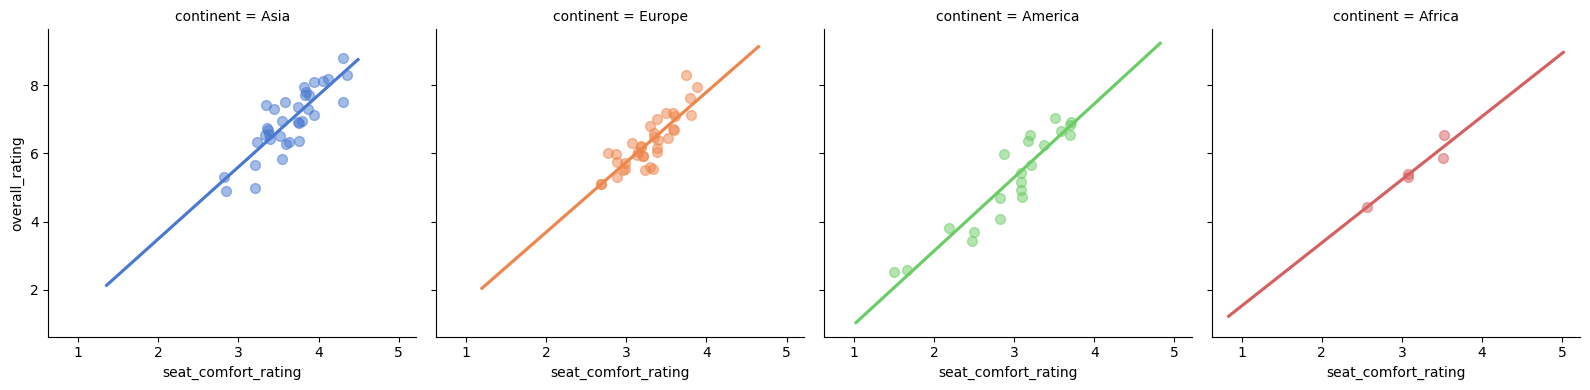

In [56]:
sns.lmplot(x="seat_comfort_rating", y="overall_rating", col="continent", hue="continent", data=air_data_merge_con4,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.5})

From the chart above, we find that the points sit on the line and Asia has highest overall rating and America has some points sit on the lower value of line. The Asia airlines have higher seat_comfort_rating compared to other airlines. The suggestion is that if the airlines in Europe, America and Africa can improve seat_comfort_rating, they can increase the overall rate.

From the correlation chart, we can see 'value_money_rating', 'cabin_staff_rating' and 'seat_comfort_rating' are three significant factors on overall rating while Cabin flown has little impact on overall rating. Therefore, we will focus on those 3 significant factors and take a closer look at how they influence overall rating.

#### 5.1.3 The effect of value money rating
We can see for airline in the major 4 continents we focus, value_money_rating has very high relationship with cabin_staff_rating and seat_comfort_rating. The correlation are all more than 0.75 on average among different continents. Therefore, when including value_money_rating in regression (the dependent variable is overall_rating), the other three variables mentioned above can be controlled variable. The estimate will be more accurate.

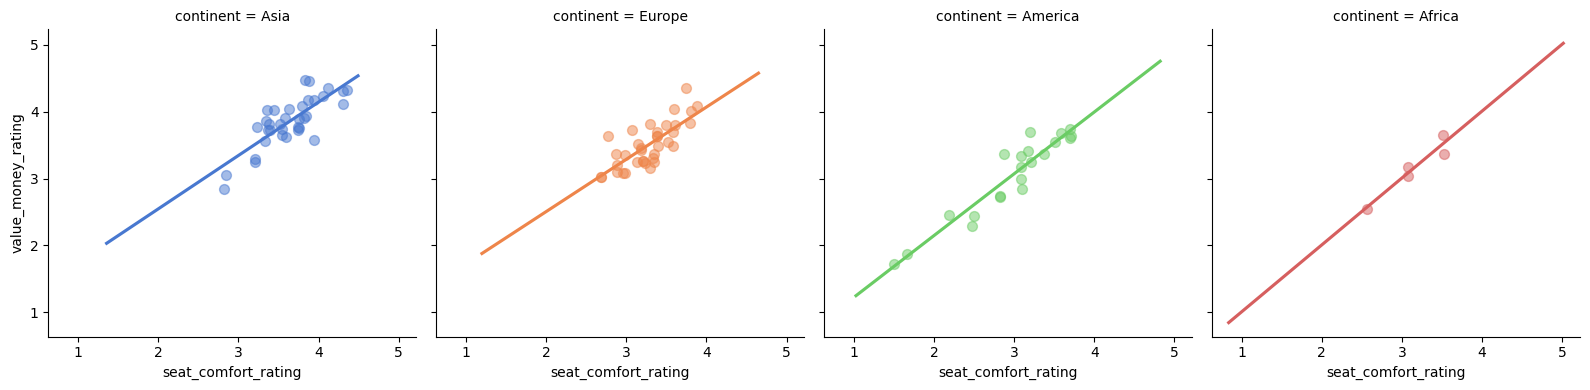

In [57]:
sns.lmplot(x="seat_comfort_rating", y="value_money_rating", col="continent", hue="continent", data=air_data_merge_con4,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.5})

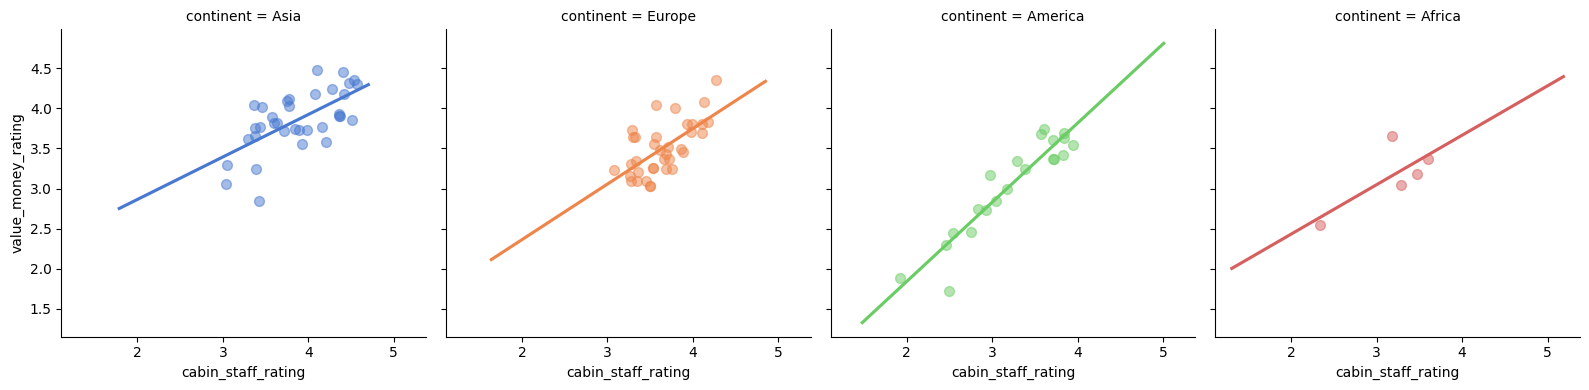

In [58]:
sns.lmplot(x="cabin_staff_rating", y="value_money_rating", col="continent", hue="continent", data=air_data_merge_con4,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.5})

#### 5.1.3.1 The regression on value_money_rating

In [59]:
reg_money = smf.ols('value_money_rating ~ cabin_staff_rating+seat_comfort_rating',air_data_merge).fit()
print(reg_money.summary())

                            OLS Regression Results                            
Dep. Variable:     value_money_rating   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     251.6
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.48e-39
Time:                        00:03:08   Log-Likelihood:                 16.516
No. Observations:                 101   AIC:                            -27.03
Df Residuals:                      98   BIC:                            -19.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0488    

The coefficient of cabin_staff_rating is 0.3292 and the coefficient of seat_comfort_rating is 0.6813. And they have large t-stats and p-value is around 0, which means these two efficients are statistically significant at 1% level of confidence. Therefore, we can say, 0.3292 increase on value_money_rating is associated with 1 unit increase on cabin_staff_rating. Similarly, 0.6813 increase on value_money_rating is associated with 1 increase on seat_comfort_rating. But we can't interpret these two effects causally, because there may be other omitted variables that influent value_money_rating through cabin_staff_rating and seat_comfort_rating.

#### 5.1.4 The value_money_rating on overall_rating. 
We can see for airline in 5 continents, cabin_staff_rating and overall_rating has linear relationship. The correlation between these two is 0.85 on average among different continent. Therefore, it will also be an important factor as indepedent varible in linear regression. 

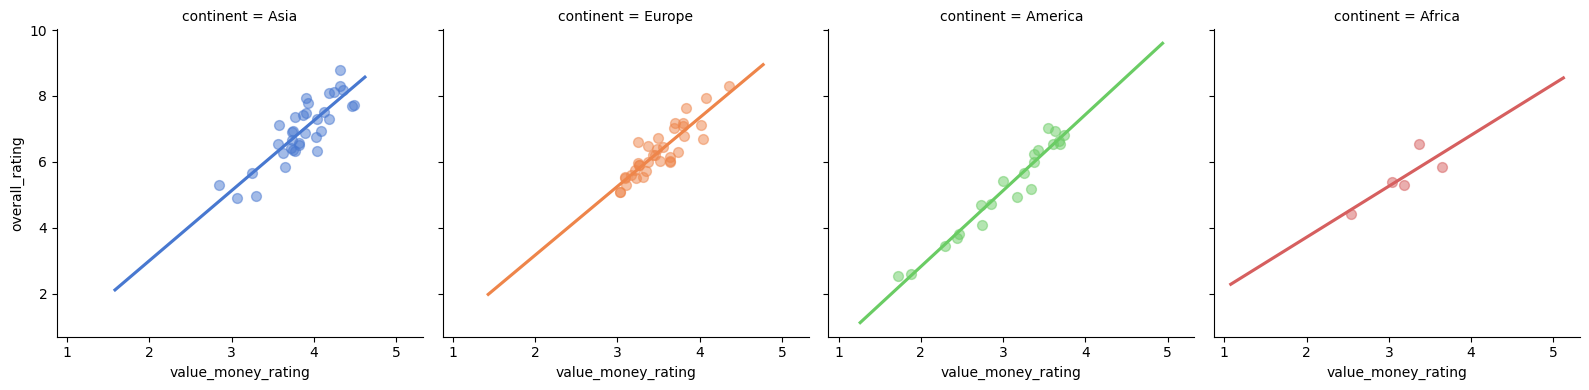

In [60]:
sns.lmplot(x="value_money_rating", y="overall_rating", col="continent", hue="continent", data=air_data_merge_con4,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.5})

From the figure above, The darker the color is, the higher correlation is. We select seat_comfort, Cabin_staff, Food_beverages, Value_money as parameter to do the regression.

### <a name="recommended"></a>5.2 Regression on variable “recommended”

#### Split data into training set and testing set for supervised learning
First we split in total 26750 entries into training set (3/4 of all data) and testing set (1/4 of all data). Then, we use the training data to train the machine to find the most suitable machine and use test set to test the accurate rate. x_train is the independent variable whose shape is 20061*5 and y_train is the label of x_train. The shape of y_train is 20061*1. The shape of x_test and y_test are 6687*5 and 6687*1 respectively. The 5 factors of x are seat_comfort_rating, cabin_staff_rating, food_beverages_rating, inflight_entertainment_rating and value_money_rating.
The label are binary variable 'recommended' which has 0 represents not recommended and 1 represents recomended.

In [61]:
air_data_60=air_data_60.dropna()
x_train,x_test,y_train,y_test = train_test_split(air_data_60[['seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
                                                              'inflight_entertainment_rating','value_money_rating']].values,air_data_60[['recommended']].values)
x = air_data_60[['seat_comfort_rating','cabin_staff_rating','food_beverages_rating',
                                                              'inflight_entertainment_rating','value_money_rating']].values
y = air_data_60[['recommended']].values

#### 5.2.1 OLS Linear regression and prediction

In [62]:
reg_lin = smf.ols('recommended ~ value_money_rating+cabin_staff_rating+seat_comfort_rating+inflight_entertainment_rating+food_beverages_rating',air_data_60).fit()
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:            recommended   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        00:03:17   Log-Likelihood:                -3062.4
No. Observations:               26369   AIC:                             6137.
Df Residuals:                   26363   BIC:                             6186.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The estimated probability of recommendation = -0.5084 + 0.1486 * value_money_rating + 0.0962 * cabin_staff_rating + 0.0566 * seat_comfort_rating + 0.0033 * inflight_entertainment_rating + 0.0223 * food_beverages_rating. The t-stats for these coefficients are large and p value are smaller than 1%. Therefore, we can say these variables are statistically significant on level of 1% confidence. The overall R-squared is 69.3%, which means 69.3% of the data points in the dataset can be explained by this linear regression model.

The advantage of using linear regression is that it is easy to calculate marginal effect of each independent variable (we can just do the derivative). However, the drawback of this approach is that the probability for recommendation may exceed [0,1]. To solve this problem, we need to use logistic regression to estimate the probability of recommendation.

In [63]:
air_data_60['recommended_hat_ols'] = reg_lin.predict()
air_data_60['ols_err'] = air_data_60['recommended'] - air_data_60['recommended_hat_ols']
air_data_60.head()

,airline_name,airline_country,continent,Year,Month,author_country,author_latitude,author_longitude,cabin_flown,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count_ppl,recommended_hat_ols,ols_err
0,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,55.378051,-3.435973,Business Class,4.0,5.0,4.0,2.0,4.0,8.0,1.0,2,1,0.885684,0.114316
1,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,55.378051,-3.435973,Economy,4.0,5.0,3.0,2.0,5.0,9.0,1.0,1,1,1.011938,-0.011938
2,Aegean Airlines,Greece,Europe,2015.0,6.0,Canada,56.130366,-106.346771,Economy,5.0,5.0,4.0,3.0,4.0,10.0,1.0,1,1,0.944620,0.055380
3,Aegean Airlines,Greece,Europe,2015.0,6.0,United Kingdom,55.378051,-3.435973,Economy,4.0,5.0,4.0,0.0,4.0,8.0,1.0,1,1,0.878988,0.121012
4,Aegean Airlines,Greece,Europe,2015.0,5.0,Greece,39.074208,21.824312,Economy,4.0,5.0,5.0,3.0,4.0,10.0,1.0,1,1,0.911379,0.088621


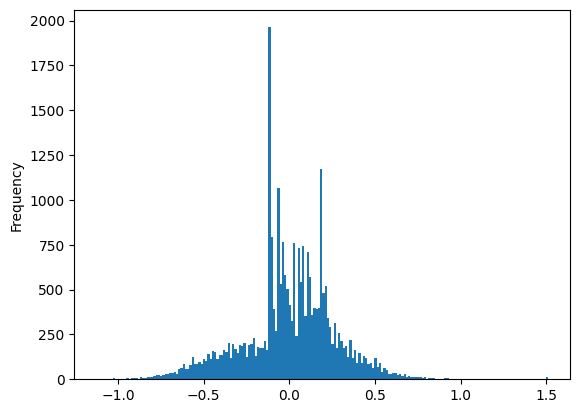

In [64]:
air_data_60['ols_err'].plot.hist(bins=200)

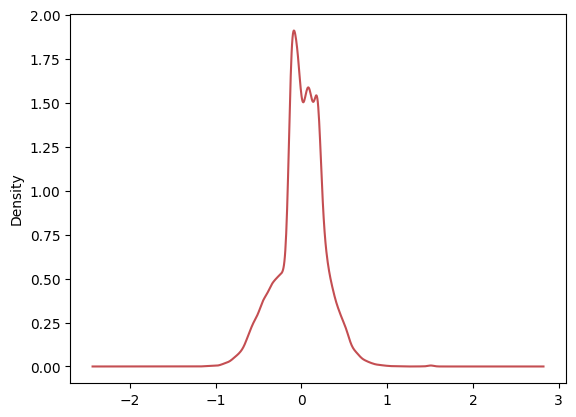

In [65]:
air_data_60['ols_err'].plot.kde(color='r')

After running the linear regression model, we drew a density histogram of ols error term to visualize the error distribution from the regression. It is quite intuitive that the error term has a zero-mean, seemingly normal distribution and standard deviation is relatively small. We think this linear model well captures the relationship between recommendation rate of the airline and airlines individual ratings.

#### 5.2.2 Sklearn Logistic regression and prediction

In [66]:
logistic = LogisticRegression().fit(x_train,y_train)

/Users/liyi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liyi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
air_data_60['recommended_hat_logi'] = logistic.predict(x)
air_data_60.head()

,airline_name,airline_country,continent,Year,Month,author_country,author_latitude,author_longitude,cabin_flown,seat_comfort_rating,...,food_beverages_rating,inflight_entertainment_rating,value_money_rating,overall_rating,recommended,cabin_dummy,count_ppl,recommended_hat_ols,ols_err,recommended_hat_logi
0,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,55.378051,-3.435973,Business Class,4.0,...,4.0,2.0,4.0,8.0,1.0,2,1,0.885684,0.114316,1.0
1,Aegean Airlines,Greece,Europe,2015.0,7.0,United Kingdom,55.378051,-3.435973,Economy,4.0,...,3.0,2.0,5.0,9.0,1.0,1,1,1.011938,-0.011938,1.0
2,Aegean Airlines,Greece,Europe,2015.0,6.0,Canada,56.130366,-106.346771,Economy,5.0,...,4.0,3.0,4.0,10.0,1.0,1,1,0.944620,0.055380,1.0
3,Aegean Airlines,Greece,Europe,2015.0,6.0,United Kingdom,55.378051,-3.435973,Economy,4.0,...,4.0,0.0,4.0,8.0,1.0,1,1,0.878988,0.121012,1.0
4,Aegean Airlines,Greece,Europe,2015.0,5.0,Greece,39.074208,21.824312,Economy,4.0,...,5.0,3.0,4.0,10.0,1.0,1,1,0.911379,0.088621,1.0


In [68]:
air_data_60.loc[air_data_60['recommended']==air_data_60['recommended_hat_logi']].shape
air_data_60.shape
accuracy = air_data_60.loc[air_data_60['recommended']==air_data_60['recommended_hat_logi']].shape[0] / air_data_60.shape[0]
print(format(accuracy, '.2%'))

92.21%


After running the logistic regression model, we calculate the accuracy rate of the its prediction and we find that the accuracy rate is around 92% which is quite high.

## <a name="Conclusion"></a>6. Conclusion

#### [Back to Directory](#Directory) <br>

To conclude, this project examines an airline traveller survey based on the feedback of 27283 travellers who travelled from 2011 to 2015 on the airline they took. Our analysis includes two part: descriptive analysis and regression analysis.

In descriptive analysis section, we focus on the demographic distribution of airlines and surveyed travellers as well as the the change of these data among time. Specfically, we look into which continents and major countries these airlines and surveyed travellers assemble, how the number of survey travellers change by year. Demographically, the majority of the travellers come from those developed and prosperous countries such as the US, the UK, Canada and Germany. An really interesting thing to notice is that in terms of the overall rating of all airlines, airlines from those countries are all below average. What's more, among the top 30 airline overall rating, almost none of them is well-known airlines in the world. Chronologically, the number of surveyed travellers continuously increases from 2011 to 2014 while it drops to the level of 2013 in 2015. However, the percentage of them coming from major 4 continents remains stable over this period. 

In the regression analysis section, we first calculate the correlation between overall rating and airlines' individual performance rating which include seat_comfort_rating, food_beverages_rating, inflight_entertainment_rating, value_money_rating, cabin_flown dummy. We find out that the cabin_flown does not significantly incluence the surveyed travellers' feedback on the airlines' overall rating and whether they recommend this airline or not. However, the rest of the variables all have extremely large t-test and their p-values are almost zero which means controlling for other related variables, these variables are significantly affect the overall rating and travellers' choice of recommending or not. 


For the linear regression model, we regress recommendation (1 stands for recommended and 0 otherwise) on five variables mentioned above. However, there are some advantages and drawbacks we need to consider when choosing the linear regression model to predict the probability of recommendation. It is an easy way to catch the marginal effect of independent variables on recommendation probability. By taking derivatives, the marginal effects are constant for each individual so that it is easy to estimate by ordinary least square. The predicted value of recommendation is a probability that a person with certain features will recommend the airline. The drawback here is that the predicted recommendation probability may exceed the [0,1]. Therefore, we considered logistic regression.

For logistic regression, the independent variable is a column matrix where each column stands for a feature of rating, and the label for those data is recommendation (1 stands for recommended and 0 otherwise) also as the dependent variable. By fitting the training data, we can find the best model to explain and predict the recommendation probability for all data. The s-shape curve for logistic probability promise the output from the model is between 0 and 1. Therefore, logistic regression can be used to regress and predict.